<a href="https://colab.research.google.com/github/samirgadkari/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

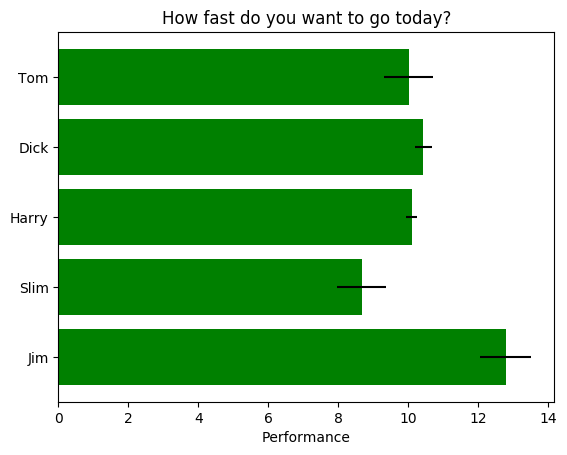

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

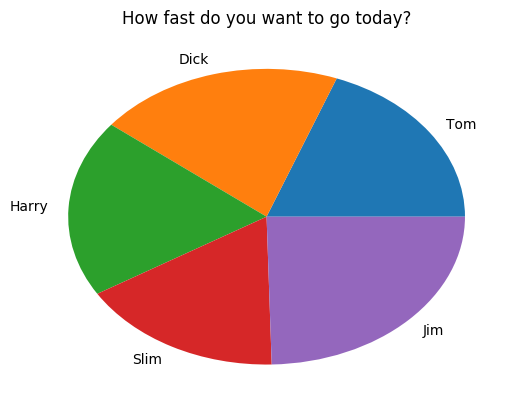

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


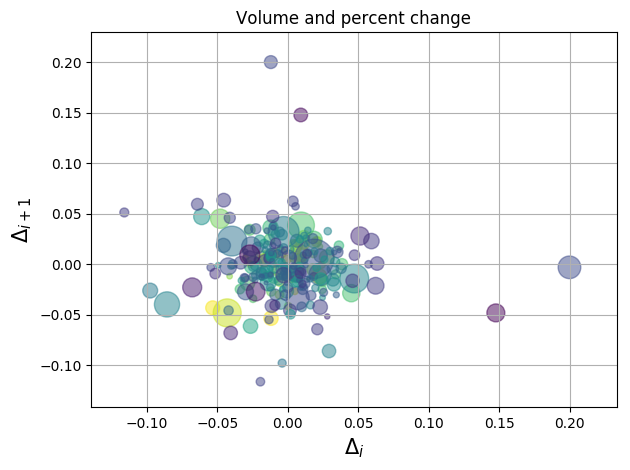

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

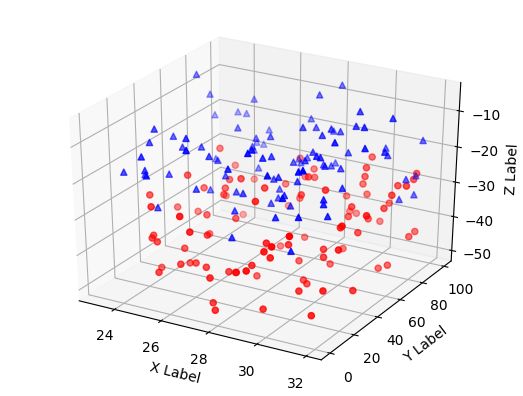

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

#My code starts here


This Soybean data was obtained from:
'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'

*   Features are all categorical. 
*    '?' is used for missing data.

  Features look like this:
    1. date:		april,may,june,july,august,september,october,?.
    2. plant-stand:	normal,lt-normal,?.
    3. precip:		lt-norm,norm,gt-norm,?.
    4. temp:		lt-norm,norm,gt-norm,?.
    5. hail:		yes,no,?.
    6. crop-hist:	diff-lst-year,same-lst-yr,same-lst-two-yrs, same-lst-sev-yrs,?.
    7. area-damaged:	scattered,low-areas,upper-areas,whole-field,?.
    8. severity:	minor,pot-severe,severe,?.
    9. seed-tmt:	none,fungicide,other,?.
   10. germination:	90-100%,80-89%,lt-80%,?.
   11. plant-growth:	norm,abnorm,?.
   12. leaves:		norm,abnorm.
   13. leafspots-halo:	absent,yellow-halos,no-yellow-halos,?.
   14. leafspots-marg:	w-s-marg,no-w-s-marg,dna,?.
   15. leafspot-size:	lt-1/8,gt-1/8,dna,?.
   16. leaf-shread:	absent,present,?.
   17. leaf-malf:	absent,present,?.
   18. leaf-mild:	absent,upper-surf,lower-surf,?.
   19. stem:		norm,abnorm,?.
   20. lodging:    	yes,no,?.
   21. stem-cankers:	absent,below-soil,above-soil,above-sec-nde,?.
   22. canker-lesion:	dna,brown,dk-brown-blk,tan,?.
   23. fruiting-bodies:	absent,present,?.
   24. external decay:	absent,firm-and-dry,watery,?.
   25. mycelium:	absent,present,?.
   26. int-discolor:	none,brown,black,?.
   27. sclerotia:	absent,present,?.
   28. fruit-pods:	norm,diseased,few-present,dna,?.
   29. fruit spots:	absent,colored,brown-w/blk-specks,distort,dna,?.
   30. seed:		norm,abnorm,?.
   31. mold-growth:	absent,present,?.
   32. seed-discolor:	absent,present,?.
   33. seed-size:	norm,lt-norm,?.
   34. shriveling:	absent,present,?.
   35. roots:		norm,rotted,galls-cysts,?.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

soy_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'
soy = pd.read_csv(soy_data_url, header = None)

columns = [ 'class-name','date','plant-stand','precip','temp','hail','crop-hist','area-damaged','severity','seed-tmt',
            'germination','plant-growth','leaves','leafspots-halo','leafspots-marg','leafspot-size','leaf-shread',
            'leaf-malf','leaf-mild','stem','lodging','stem-cankers','canker-lesion','fruiting-bodies','external decay',
            'mycelium','int-discolor','sclerotia','fruit-pods','fruit spots','seed','mold-growth','seed-discolor',
            'seed-size','shriveling','roots' ]
soy.columns = columns
# From looking at the data, we see that NA values are coded as '?'.
# Replace these values with NaN
soy_with_nas = soy.replace('?', np.nan)
soy_with_nas.isna().sum()

# Let's replace missing values with the median of each column.
def replace_missing(df):
  df_copy = df.copy()
  for col in df.columns.values:
    df_copy[col].fillna(df[col].mode()[0], inplace = True)
  return df_copy

soy_after_replacement = replace_missing(soy_with_nas)


In [0]:
#
# Check to make sure the data looks correct !!!!!
#
print('Number of NAs after replacement:', soy_after_replacement.isna().sum().sum())

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(soy_after_replacement.head(400))


Number of NAs after replacement: 0
                      class-name date plant-stand precip temp hail crop-hist area-damaged severity seed-tmt germination plant-growth  leaves leafspots-halo leafspots-marg leafspot-size leaf-shread leaf-malf leaf-mild stem lodging stem-cankers canker-lesion fruiting-bodies external decay mycelium int-discolor sclerotia fruit-pods fruit spots seed mold-growth seed-discolor seed-size shriveling roots
0          diaporthe-stem-canker    6           0      2    1    0         1            1        1        0           0            1       1              0              2             2           0         0         0    1       1            3             1               1              1        0            0         0          0           4    0           0             0         0          0     0
1          diaporthe-stem-canker    4           0      2    1    0         2            0        2        1           1            1       1              0        

In [0]:
print(soy_after_replacement.head())

              class-name date plant-stand precip temp hail crop-hist area-damaged severity seed-tmt germination plant-growth  leaves leafspots-halo leafspots-marg leafspot-size leaf-shread leaf-malf leaf-mild stem lodging stem-cankers canker-lesion fruiting-bodies external decay mycelium int-discolor sclerotia fruit-pods fruit spots seed mold-growth seed-discolor seed-size shriveling roots
0  diaporthe-stem-canker    6           0      2    1    0         1            1        1        0           0            1       1              0              2             2           0         0         0    1       1            3             1               1              1        0            0         0          0           4    0           0             0         0          0     0
1  diaporthe-stem-canker    4           0      2    1    0         2            0        2        1           1            1       1              0              2             2           0         0         0    1 

In [0]:
plants = soy_after_replacement.groupby(['class-name'])['date']
plants.groups

{'2-4-d-injury': Int64Index([302], dtype='int64'),
 'alternarialeaf-spot': Int64Index([210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249], dtype='int64'),
 'anthracnose': Int64Index([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199], dtype='int64'),
 'bacterial-blight': Int64Index([150, 151, 152, 153, 154, 155, 156, 157, 158, 159], dtype='int64'),
 'bacterial-pustule': Int64Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169], dtype='int64'),
 'brown-spot': Int64Index([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], dtype='int64'),
 'brown-stem-rot': Int64Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,

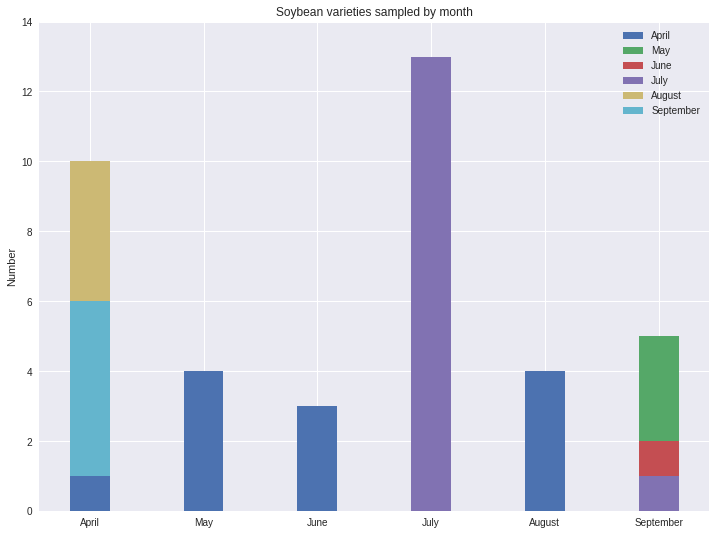

In [0]:
# There are too many plant categories,
# drop some so it is easy to compare
# between categories.
smaller_soy = soy_after_replacement.iloc[:100, :]

plt.figure(figsize = (12, 9))

months = 'April,May,June,July,August,September'.split(',')

# Check out unstack() at 
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
# plants = smaller_soy.groupby(['class-name']).date.value_counts().unstack(0).plot.barh();
plants = smaller_soy.groupby(['class-name']).date.value_counts().unstack(0)

width = 0.35
index = np.arange(len(months))

plots = [plt.bar(index, plants.values[i], width) for i in range(len(plants.values))]

plt.ylabel('Number')
plt.title('Soybean varieties sampled by month')
plt.xticks(index, months)
plt.yticks(np.arange(0, 15, 2))
plt.legend(plots, months)

plt.show()

Q. What insight do your plots give you in the data?
A. They show in which month data was collected for each Soybean variety

---

Q. What was most challenging about making plots?
A. More than plotting, it was understanding df.groupby. So basically manipulating data was the big issue.

# Automobile dataset
Since we have only categorical data in the soybean dataset,
lets get another dataset.
We will use the automobile dataset from:
http://archive.ics.uci.edu/ml/datasets/Automobile


This is how the  Automobile dataset features are distributed:

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

csv_cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
            'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 
            'wheel-base', 'length', 'width', 'height', 'curb-weight', 
            'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 
            'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 
            'city-mpg', 'highway-mpg', 'price' ]

auto = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',
                    na_values = '?', 
                    header = None)
auto.columns = csv_cols
auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


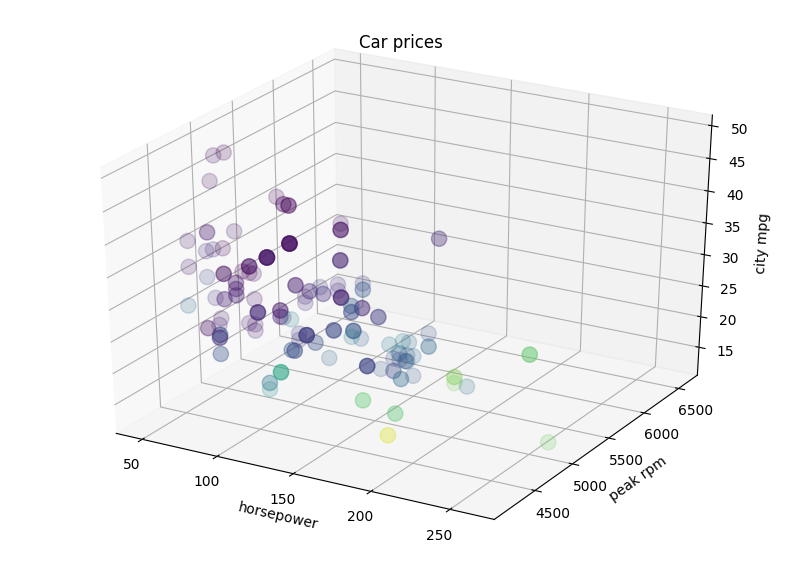

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel('horsepower')
ax.set_ylabel('peak rpm')
ax.set_zlabel('city mpg')

ax.scatter(auto['horsepower'], auto['peak-rpm'], auto['city-mpg'],
            c = auto['price'], cmap='viridis', alpha = 0.2, s = 120);
ax.set_title('Car prices')
plt.show()

In [19]:
car_manufacturers = ['alfa-romero', 'audi', 'bmw', 'chevrolet', 
                     'dodge', 'honda', 'isuzu', 'jaguar']
some_cars = auto[auto['make'].isin(car_manufacturers)]

price_bins = pd.cut(some_cars['price'], 5)
# hp_bins = pd.cut(some_cars['horsepower'], 5)
ct = pd.crosstab([some_cars['make'], price_bins], 
                  some_cars['horsepower'])
ct

horsepower                       48.0   58.0   60.0   68.0   70.0   76.0   \
make        price                                                           
alfa-romero (5114.836, 12383.8]      0      0      0      0      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
audi        (5114.836, 12383.8]      0      0      0      0      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
bmw         (5114.836, 12383.8]      0      0      0      0      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
chevrolet   (5114.836, 12383.8]      1      0      0      0      2      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
dodge       (5114.836, 12383.8]      0      0      0      5      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
honda       (5114.836, 12383.8]      0      1      1      0      0      5   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
isuzu       (5114.836, 12383.8]      0      0      0      0      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   
jaguar      (5114.836, 12383.8]      0      0      0      0      0      0   
            (12383.8, 19616.6]       0      0      0      0      0      0   
            (19616.6, 26849.4]       0      0      0      0      0      0   
            (26849.4, 34082.2]       0      0      0      0      0      0   
            (34082.2, 41315.0]       0      0      0      0      0      0   

horsepower                       78.0   86.0   88.0   90.0   ...    111.0  \
make        price                                            ...            
alfa-romero (5114.836, 12383.8]      0      0      0      0  ...        0   
            (12383.8, 19616.6]       0      0      0      0  ...        2   
            (19616.6, 26849.4]       0      0      0      0  ...        0   
            (26849.4, 34082.2]       0      0      0      0  ...        0   
            (34082.2, 41315.0]       0      0      0      0  ...        0   
audi        (5114.836, 12383.8]      0      0      0      0  ...        0   
            (12383.8, 19616.6]       0      0      0      0  ...        0   
            (19616.6, 26849.4]       0      0      0      0  ...        

In [13]:
plt.boxplot(some_cars['make', 'price'])

KeyError: ignored